# Multidimensional scaling of E-MAP data
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# read in r dataframe
# data = pd.read_csv("/Users/annie/emap/20180109/final.csv")
data = pd.read_csv("/Users/annie/emap/20180109/corr_of_corr_no_na_no_mut_sep_no_na.csv")

Look at the dataframe we've read in.

In [3]:
data.head()

,method,value,mutant,partner,protein,ORF,cluster_number,cluster
0,corr_of_corr_no_na_no_mut,-0.441411,K129F,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
1,corr_of_corr_no_na_no_mut,-0.246723,K129I,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
2,corr_of_corr_no_na_no_mut,-0.374419,K129T,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
3,corr_of_corr_no_na_no_mut,-0.449169,K132H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2
4,corr_of_corr_no_na_no_mut,0.375386,K143H,CIN1 - YOR349W,CIN1,YOR349W,10,Golgi and ER_GO_2


In [4]:
#data = data[data['cluster'] == 'Golgi and ER_GO_2']
data = data[data['cluster'] == 'chromatin_GO_1']

In [5]:
data.shape

(32509, 8)

In [6]:
data['mut_cluster'] = data.mutant + "-" + data.cluster

In [7]:
data.columns

Index(['method', 'value', 'mutant', 'partner', 'protein', 'ORF',
       'cluster_number', 'cluster', 'mut_cluster'],
      dtype='object')

Now create correlation of correlations matrix for entire set of proteins. In matrix, the index denotes the correlation of correlation for a given mutant-cluster and the column labels denote the protein. 

In [8]:
# create dictionary with list of mut_cluster for each protein
proteins = pd.unique(data.protein).tolist()
i = 0
f = [None] * len(proteins)
for protein in proteins:
    data_protein = data[data.protein == protein]
    f[i] = data_protein.mut_cluster
    i = i+1
d = dict(zip(proteins, f))

In [9]:
# mut_cluster is a list of all mut_cluster
mut_cluster = pd.unique(data.mut_cluster).tolist()

# initialize empty dataframe with rownames as the unique mut_cluster
cmat = pd.DataFrame([], index = mut_cluster)

# need a counter for column names
i = 0

# loop through the proteins
for protein, c in d.items():
    df_protein = data[data.protein == protein]
    #create column of data frame
    column = []
    for mc in mut_cluster:
        v = df_protein[df_protein.mut_cluster == mc].value
        #if v.empty:
            #column.append(0)
        #else:
        column.append(v.values[0])
    #create index name
    index = str(i)
    #add column
    cmat[index] = column
    #update index
    i = i + 1

cmat[10:20]

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
N102K-chromatin_GO_1,-0.568236,-0.621584,-0.617449,-0.248388,-0.629979,-0.368169,-0.168327,0.290335,-0.192623,-0.318729,...,-0.352028,0.131539,0.164672,-0.152415,-0.619630,0.547002,0.198292,0.301057,0.181736,0.069905
N102M-chromatin_GO_1,-0.168704,-0.429417,-0.450278,-0.096941,-0.448739,0.001793,-0.275499,0.090879,-0.293210,-0.083871,...,-0.235530,-0.089817,0.018609,-0.140559,-0.128849,0.450946,0.301596,0.170870,-0.070537,-0.047816
N105L-chromatin_GO_1,-0.316979,0.094046,0.126444,0.429535,0.176562,0.033045,0.341319,0.155076,0.190772,-0.163672,...,0.366102,0.160522,0.152127,0.159847,-0.009445,0.019267,-0.195863,0.130727,-0.117321,-0.132649
N105V-chromatin_GO_1,0.202074,0.307263,0.332511,0.066772,0.291984,0.277969,0.252296,-0.055901,0.068685,0.012920,...,0.115260,0.052835,0.293578,0.110956,0.192643,-0.286148,-0.269391,-0.064328,-0.341450,-0.184371
N84Y-chromatin_GO_1,0.164017,0.406522,0.385901,0.316437,0.396199,0.051982,0.558303,-0.361823,-0.224352,0.264211,...,0.055698,0.344696,0.496992,0.569951,0.512655,-0.209858,0.040529,0.236281,-0.037705,-0.202710
NTER3XFLAG WT-chromatin_GO_1,-0.537489,-0.346873,-0.336191,0.057365,-0.294863,-0.359799,-0.035075,0.300796,-0.135820,-0.190091,...,0.028041,0.014685,-0.128613,-0.111394,-0.316649,0.374848,0.133166,0.220688,0.596727,0.348757
Q147E-chromatin_GO_1,-0.490150,-0.350326,-0.346419,0.101317,-0.270405,-0.309020,0.033680,0.178085,0.251832,-0.232556,...,0.040407,0.154915,0.090632,0.017308,-0.477170,0.262148,-0.013311,0.261978,0.136590,-0.074974
Q147L-chromatin_GO_1,0.438198,0.024169,0.064030,-0.273576,-0.125375,0.287758,-0.355733,-0.336304,-0.266664,0.286662,...,-0.293506,-0.295186,-0.247393,-0.298509,0.206309,-0.043714,0.162677,-0.198722,-0.285147,-0.084404
R108A-chromatin_GO_1,-0.030607,0.561038,0.575072,0.456857,0.600369,0.233836,0.581784,0.046173,0.321017,0.071983,...,0.539909,0.169035,0.189214,0.318912,0.218114,-0.384325,-0.559192,-0.211664,-0.095405,-0.112797
R108D-chromatin_GO_1,-0.057802,-0.463361,-0.446239,-0.163253,-0.433779,0.210006,-0.317438,0.257081,-0.116623,-0.068284,...,-0.360722,-0.086158,-0.039210,-0.122923,-0.112579,0.348657,0.165224,0.077117,-0.287469,-0.153755


In [10]:
len(proteins)

528

In [11]:
cmat.shape

(59, 528)

### Distance between protein interaction profiles

In [12]:
from sklearn.manifold import MDS
from scipy.spatial import distance

Plotting infrastructure setup

In [13]:
def simple_scatterplot(x,y,title,labels,savepath):
    # Scatterplot with a title and labels
    fig, ax = plt.subplots(figsize=(16,14))
    ax.scatter(x, y, marker='o')
    plt.title(title, fontsize=14)
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i],y[i]))
    #save file
    if (savepath != None):
        plt.savefig(savepath)
    return ax

In [14]:
def fit_MDS_2D(distances):
    # A simple MDS embedding plot:
    mds = MDS(n_components=2, dissimilarity='precomputed',random_state=123)
    #fit based on computed Euclidean distances
    mds_fit = mds.fit(distances)
    #get 2D Euclidean points of presidents
    points = mds_fit.embedding_
    return points

In [15]:
norm=cmat.fillna(0)

Make a numpy array version of the dataframe to use with Scikit-Learn:

In [16]:
norm = np.array(norm)
norm.shape

(59, 528)

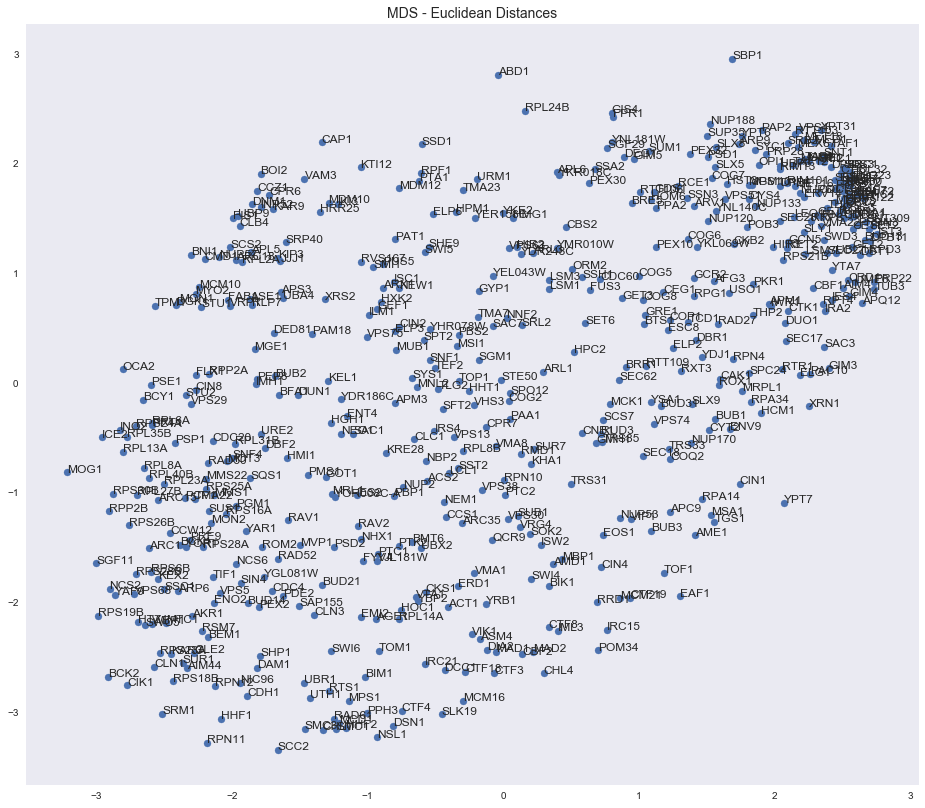

In [17]:
#Intialize empty matrix of Euclidean distances
euc_dists = np.zeros(shape = (norm.shape[1], norm.shape[1]))
#loop through columns
for i in range(norm.shape[1]):
    #catch first column to compare
    cur_col = norm[:, i]
    #loop through remaining columns
    for j in range(i, norm.shape[1], 1):
        #catch second column to compare
        comp_col = norm[:, j]
        
        #compute Euclidean Distance
        euc_dist = distance.euclidean(cur_col, comp_col)
        euc_dists[i, j] = euc_dist
        
        #the matrices are symmetric, saves runntime to do this
        if (i != j):
            euc_dists[j, i] = euc_dist

# Fit with MDS
points_euclidean = fit_MDS_2D(euc_dists)

# Create scatter plot of projected points based on Euclidean Distances
simple_scatterplot(points_euclidean[:,0],points_euclidean[:,1],
                   "MDS - Euclidean Distances",
                   proteins,
                   'results/mds_1.png'
                  );

In [18]:
def plot_embedding(data, title='MDS Embedding', savepath=None, palette='viridis', 
                   size=7):
    """Plot an MDS embedding dataframe for all presidents.
    
    Uses Seaborn's `lmplot` to create an x-y scatterplot of the data, encoding the 
    value of the investor field into the hue (which can be mapped to any desired
    color palette).
    
    Parameters
    ----------
    data : DataFrame
        A DataFrame that must contain 3 columns labeled 'x', 'y' and 'investor'.
        
    title : optional, string
        Title for the plot
        
    savepath : optional, string
        If given, a path to save the figure into using matplotlib's `savefig`.
        
    palette : optional, string
        The name of a valid Seaborn palette for coloring the points.
    
    size : optional, float
        Size of the plot in inches (single number, square plot)
        
    Returns
    -------
    FacetGrid
        The Seaborn FacetGrid object used to create the plot.
    """
    #process data
    x = data['x']
    y = data['y']
    protein = data['protein']
    
    #set boolean for using or not using annotation
    do_annotate = False
    
    #create scatterplot using linear model without a regression fit
    p = sns.lmplot(x = "x", y = "y", data = data, hue = "protein", palette = palette, size = size, fit_reg= False, legend=False)
    p.ax.legend(bbox_to_anchor=(1.01, 0.85),ncol=2)
    
    #this is used in order to annotate
    ax = plt.gca()
    
    #make grid and set title
    plt.grid()
    plt.title(title,fontsize=16)
    
    #adjust border for file saving so not cut-off
    plt.tight_layout()
    
    #save file
    if (savepath != None):
        plt.savefig(savepath)

In [19]:
#create embed_peu data frame
embed_peu = pd.DataFrame([])
embed_peu['x'] = points_euclidean[:, 0]
embed_peu['y'] = points_euclidean[:, 1]
embed_peu['protein'] = proteins

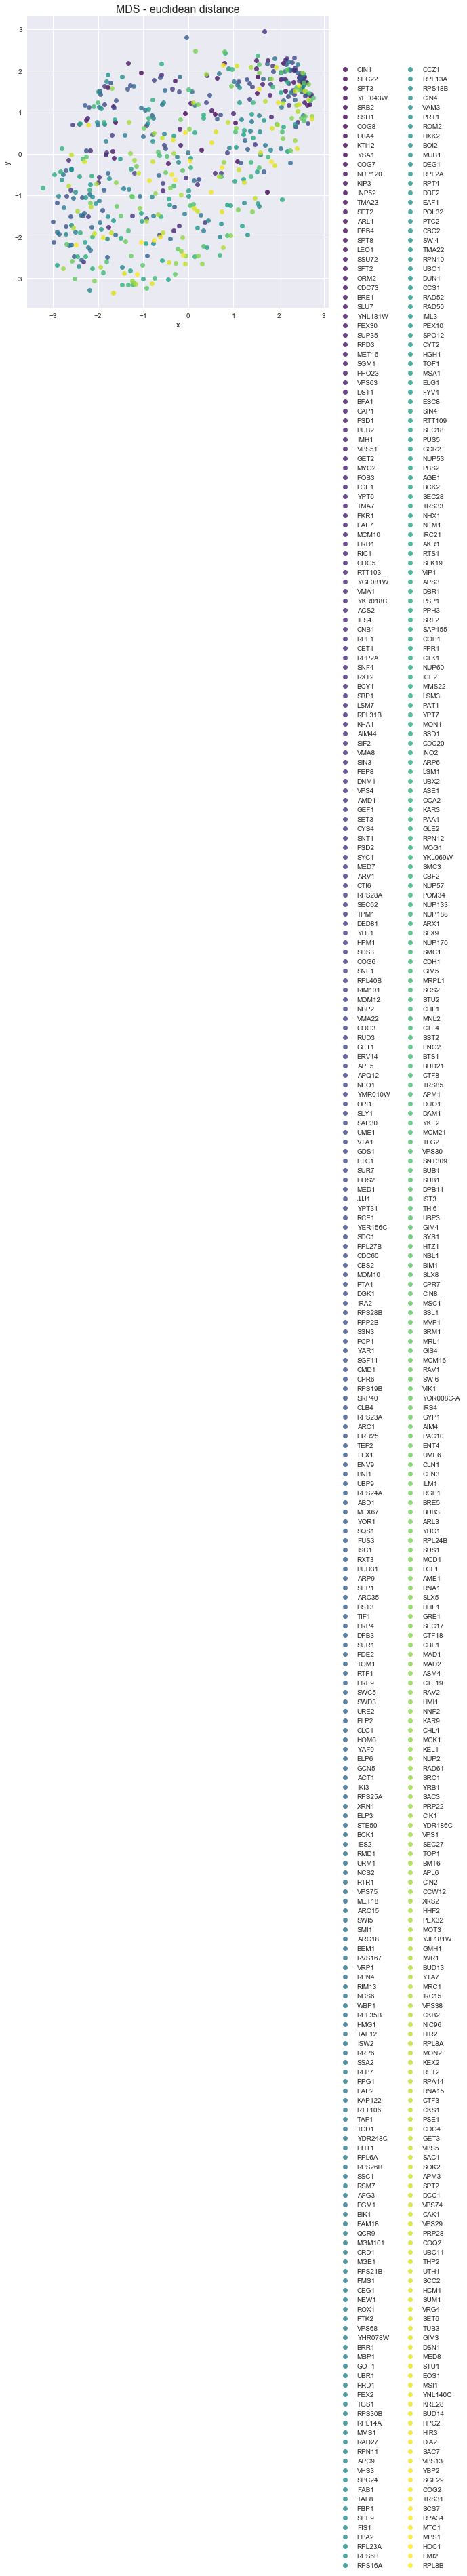

In [20]:
plot_embedding(embed_peu, 'MDS - euclidean distance', 'results/mds.png');